In [3]:
import os
import numpy as np
import torch
from torch import nn
import math
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms

"Зафиксируем случайность", чтобы наш эксперимент был воспроизводим.

In [ ]:
torch.manual_seed(111)

In [ ]:
# task 1

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

Mean: tensor(144.5019)


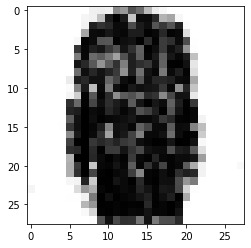

In [ ]:
generator = torch.load('/content/generator_20')
tensor = torch.load('/content/Comp_Vision_Task_6_Test_file_19.pt')
generated_sample = generator(tensor)
generated_sample = generated_sample.cpu().detach()
res=generated_sample[0][0]
res_img=(res-res.min())/(res.max()-res.min())*255
res_img=255-res_img
plt.imshow(res_img, cmap="gray")
print('Mean:', res_img.mean())

# Новый раздел

In [1]:
# task 2

In [4]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
!pip install -r pytorch-CycleGAN-and-pix2pix/requirements.txt
!bash pytorch-CycleGAN-and-pix2pix/scripts/download_cyclegan_model.sh style_monet
os.makedirs('/content/pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testC', exist_ok=True)

fatal: destination path 'pytorch-CycleGAN-and-pix2pix' already exists and is not an empty directory.
Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_monet]
for details.

--2022-05-04 17:05:59--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_monet.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_monet_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43.46M  40.0MB/s    in 1.1s    

2022-05-04 17:06:00 (4

In [5]:
# поместить фотографию в папку testC
!python pytorch-CycleGAN-and-pix2pix/test.py --dataroot '/content/pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testC' --name style_monet_pretrained --model test  --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testC	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_i

In [6]:
import matplotlib.pyplot as plt

res=plt.imread('/content/results/style_monet_pretrained/test_latest/images/peter-3794597_1280_fake.png')
img=(res)*255
plt.imshow(img.astype(int))
print('Mean:', img.mean())

FileNotFoundError: ignored